# WeatherPy
#----Observations:
1. In the northern hemisphere the tempature increases as the latitude increases. So as the we move away from the equator to the north - the tempature decreases. 
2. In the southern hemisphere, the tempature increases as you get closer to the equator. 
3. In the northern hemishere, the humidity increases as you move away for the equator (0 lattitude).


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Output File (CSV)
output_data_file = "cities.csv"


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | cruzilia
Processing Record 4 of Set 1 | mahibadhoo
Processing Record 5 of Set 1 | mys shmidta
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | turangi
Processing Record 11 of Set 1 | norman wells
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | san cristobal
Processing Record 14 of Set 1 | san luis
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | mugumu
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | naryan-mar
City not found. Skipping...
Processing Record 20 of Set 1 | ogembo
Processing Record 21 of Set 1 | port hedland
City not found. Skipping...
Processing Record 22 of Set 1 | thompson
Processing Record 23 of Set 1 | pr

City not found. Skipping...
Processing Record 39 of Set 4 | carnarvon
Processing Record 40 of Set 4 | san vicente
Processing Record 41 of Set 4 | mayo
Processing Record 42 of Set 4 | pitimbu
Processing Record 43 of Set 4 | stromness
Processing Record 44 of Set 4 | iqaluit
Processing Record 45 of Set 4 | nekhayevskiy
Processing Record 46 of Set 4 | arlit
Processing Record 47 of Set 4 | brae
Processing Record 48 of Set 4 | vestmannaeyjar
Processing Record 49 of Set 4 | zhoucheng
Processing Record 1 of Set 5 | belyy yar
Processing Record 2 of Set 5 | luohe
Processing Record 3 of Set 5 | tuatapere
City not found. Skipping...
Processing Record 4 of Set 5 | borgo san dalmazzo
Processing Record 5 of Set 5 | nanortalik
Processing Record 6 of Set 5 | maniitsoq
Processing Record 7 of Set 5 | buluang
Processing Record 8 of Set 5 | maldonado
Processing Record 9 of Set 5 | parli
Processing Record 10 of Set 5 | tasiilaq
Processing Record 11 of Set 5 | tiznit
Processing Record 12 of Set 5 | khvastovi

City not found. Skipping...
Processing Record 26 of Set 8 | pacific grove
Processing Record 27 of Set 8 | kloulklubed
Processing Record 28 of Set 8 | soyaux
Processing Record 29 of Set 8 | chiltepec
Processing Record 30 of Set 8 | teya
City not found. Skipping...
Processing Record 31 of Set 8 | buala
Processing Record 32 of Set 8 | turochak
Processing Record 33 of Set 8 | east london
Processing Record 34 of Set 8 | dhidhdhoo
Processing Record 35 of Set 8 | nandigama
Processing Record 36 of Set 8 | porecatu
Processing Record 37 of Set 8 | yar-sale
Processing Record 38 of Set 8 | boa vista
Processing Record 39 of Set 8 | mindelo
Processing Record 40 of Set 8 | baker city
Processing Record 41 of Set 8 | deder
Processing Record 42 of Set 8 | yulara
Processing Record 43 of Set 8 | akyab
City not found. Skipping...
Processing Record 44 of Set 8 | port shepstone
Processing Record 45 of Set 8 | vila franca do campo
Processing Record 46 of Set 8 | roald
Processing Record 47 of Set 8 | boda
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:

# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

weather_dict

{'City': ['vaini',
  'punta arenas',
  'cruzilia',
  'mahibadhoo',
  'mys shmidta',
  'castro',
  'lebu',
  'butaritari',
  'rikitea',
  'turangi',
  'norman wells',
  'ushuaia',
  'san cristobal',
  'san luis',
  'saint-philippe',
  'mugumu',
  'port alfred',
  'dikson',
  'naryan-mar',
  'ogembo',
  'port hedland',
  'thompson',
  'provideniya',
  'sukhumi',
  'airai',
  'arraial do cabo',
  'esperance',
  'kaitangata',
  'ponta do sol',
  'ribeira grande',
  'hermanus',
  'bredasdorp',
  'verkh-usugli',
  'mahebourg',
  'severo-kurilsk',
  'mataura',
  'haines junction',
  'port hardy',
  'praia',
  'ancud',
  'albany',
  'upernavik',
  'necocli',
  'ambulu',
  'souillac',
  'san patricio',
  'kushmurun',
  'busselton',
  'vao',
  'inverness',
  'gweta',
  'longyearbyen',
  'clyde river',
  'usvyaty',
  'grand river south east',
  'amahai',
  'kodiak',
  'kapaa',
  'lavrentiya',
  'cherskiy',
  'hobart',
  'sept-iles',
  'penapolis',
  'carutapera',
  'tecoanapa',
  'deer lake',
  '

In [5]:
# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)
weather_dataframe.to_csv (output_data_file, index = False)


In [6]:
# show the top of the dataframe
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,vaini,25,TO,1579991702,87,-21.20,-175.20,78.55,19.64
1,punta arenas,9,PH,1579991811,85,8.99,125.34,77.97,4.94
2,cruzilia,5,BR,1579991811,92,-21.84,-44.81,63.36,3.65
3,mahibadhoo,100,MV,1579991812,79,3.78,72.97,80.82,13.89
4,mys shmidta,100,RU,1579991812,96,62.06,48.62,4.10,3.89


In [7]:
weather_dataframe.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [8]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,vaini,25,TO,1579991702,87,-21.20,-175.20,78.55,19.64
1,punta arenas,9,PH,1579991811,85,8.99,125.34,77.97,4.94
2,cruzilia,5,BR,1579991811,92,-21.84,-44.81,63.36,3.65
3,mahibadhoo,100,MV,1579991812,79,3.78,72.97,80.82,13.89
4,mys shmidta,100,RU,1579991812,96,62.06,48.62,4.10,3.89


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [9]:
time.strftime('%x')

'01/25/20'

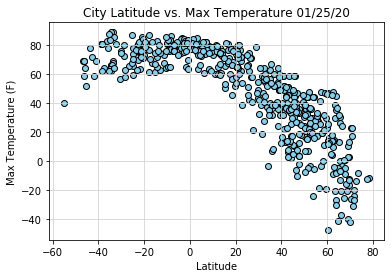

In [10]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig1.png")
plt.show()

In [11]:
#This graph analyzes latitude vs tempature

#### Latitude vs. Humidity Plot

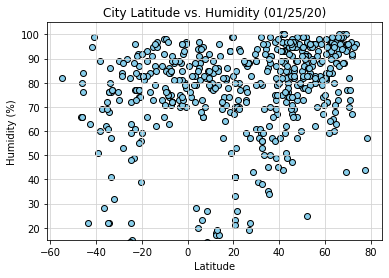

In [12]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime('%x') )
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig2.png")
plt.show()

In [13]:
#Analyzing the Humidity vs Latitude

#### Latitude vs. Cloudiness Plot

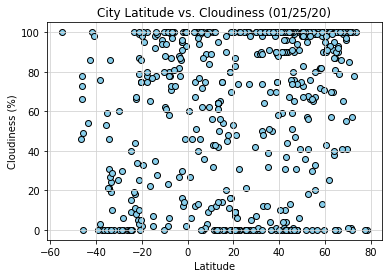

In [14]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime('%x') )               
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig3.png")
plt.show()

In [15]:
#Analyzes the latitude and cloudiness of the cities

#### Latitude vs. Wind Speed Plot

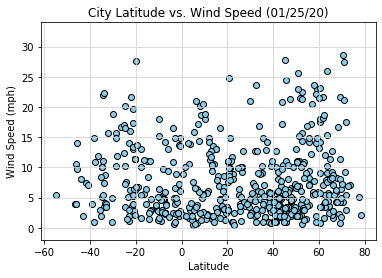

In [16]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime('%x') )
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig4.png")
plt.show()

In [ ]:
#This the relationship between latitude and windspeed

## Linear Regression

In [17]:
#Define x and y values
x_values = weather_dataframe['Lat']
y_values = weather_dataframe['Max Temp']


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      82.274454
1      59.296487
2      82.761566
3      63.261880
4      18.904279
         ...    
546    31.592014
547    23.805840
548    61.419989
549    20.160114
550    70.218442
Name: Lat, Length: 551, dtype: float64


In [18]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.76x +66.14


The r-squared is: -0.7946821335281774


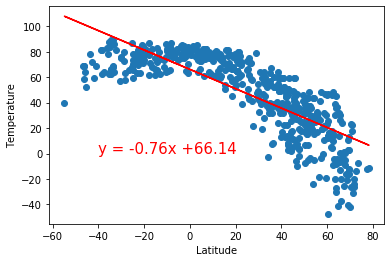

In [19]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-40,0),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames
south_df = weather_dataframe[weather_dataframe["Lat"] < 0]    
north_df = weather_dataframe[weather_dataframe["Lat"] >= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -1.28


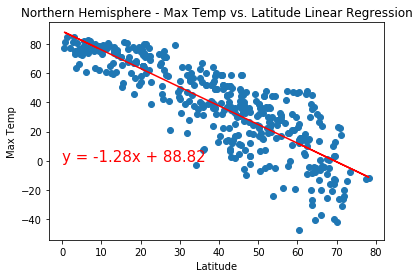

In [21]:
def linear_agression(x,y):
    print(f'The r-squared is : {round(linregress(x, y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,'r-')
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')



# Call an function #1
equation = linear_agression(north_df['Lat'], north_df['Max Temp'])
# Call an function #2
annotate(equation, 0, 0)
# Set a title
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
# Set xlabel
plt.xlabel('Latitude')
# Set ylabel
plt.ylabel('Max Temp')
# Save the figure
plt.savefig('Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png')

In [22]:
# This graph shows the relationship in the Nouthern Hemisphere between Temp vs. latitude

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.27


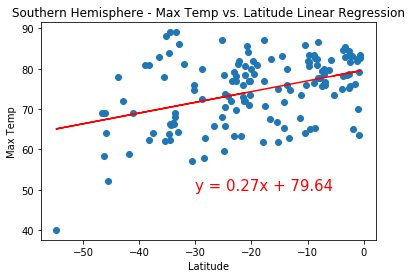

In [23]:
def linear_agression(x,y):
    print(f'The r-squared is : {round(linregress(x, y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,'r-')
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')



# Call an function #1
equation = linear_agression(south_df['Lat'], south_df['Max Temp'])
# Call an function #2
annotate(equation, -30, 50)
# Set a title
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
# Set xlabel
plt.xlabel('Latitude')
# Set ylabel
plt.ylabel('Max Temp')
# Save the figure
plt.savefig('Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png')

In [24]:
# This graph shows the relationship in the southern Hemisphere between Temp vs. latitude

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.41


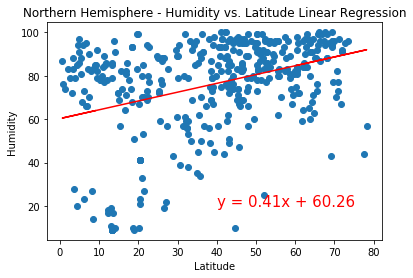

In [25]:
def linear_agression(x,y):
    print(f'The r-squared is : {round(linregress(x, y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,'r-')
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')



# Call an function #1
equation = linear_agression(north_df['Lat'], north_df['Humidity'])
# Call an function #2
annotate(equation, 40, 20)
# Set a title
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
# Set xlabel
plt.xlabel('Latitude')
# Set ylabel
plt.ylabel('Humidity')
# Save the figure
plt.savefig('Northern Hemisphere - Humidity vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.45


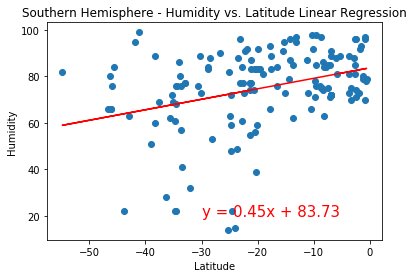

In [26]:
def linear_agression(x,y):
    print(f'The r-squared is : {round(linregress(x, y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,'r-')
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')



# Call an function #1
equation = linear_agression(south_df['Lat'], south_df['Humidity'])
# Call an function #2
annotate(equation,-30, 20)
# Set a title
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
# Set xlabel
plt.xlabel('Latitude')
# Set ylabel
plt.ylabel('Humidity')
# Save the figure
plt.savefig('Southern Hemisphere - Humidity vs. Latitude Linear Regression.png')

In [27]:
# This graph shows the relationship in the Southern Hemisphere between humidity vs. lattitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.41


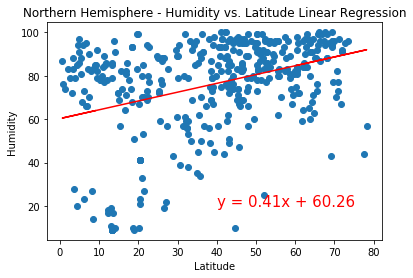

In [28]:
def linear_agression(x,y):
    print(f'The r-squared is : {round(linregress(x, y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,'r-')
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')



# Call an function #1
equation = linear_agression(north_df['Lat'], north_df['Humidity'])
# Call an function #2
annotate(equation, 40, 20)
# Set a title
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
# Set xlabel
plt.xlabel('Latitude')
# Set ylabel
plt.ylabel('Humidity')
# Save the figure
plt.savefig('Northern Hemisphere - Humidity vs. Latitude Linear Regression.png')

In [29]:
# This graph shows the relationship in the Northern Hemisphere between humidity vs. lattitude

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 1.14


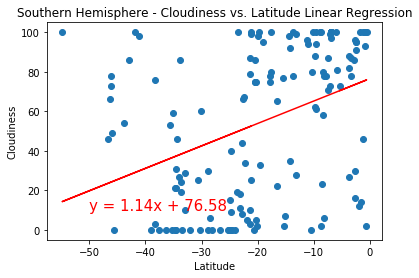

In [30]:
def linear_agression(x,y):
    print(f'The r-squared is : {round(linregress(x, y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,'r-')
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')



# Call an function #1
equation = linear_agression(south_df['Lat'], south_df['Cloudiness'])
# Call an function #2
annotate(equation,-50, 10)
# Set a title
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
# Set xlabel
plt.xlabel('Latitude')
# Set ylabel
plt.ylabel('Cloudiness')
# Save the figure
plt.savefig('Southern Hemisphere - Cloudiness vs. Lattude Linear Regression.png')

In [31]:
#This grpah shows the relationship in the southern hempisphere with cloudiness vs lattitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.03


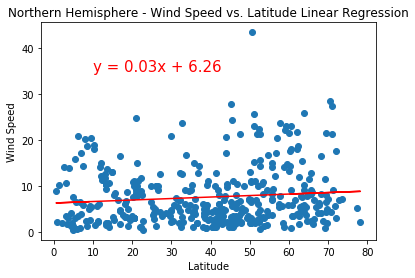

In [32]:
def linear_agression(x,y):
    print(f'The r-squared is : {round(linregress(x, y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,'r-')
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')



# Call an function #1
equation = linear_agression(north_df['Lat'], north_df['Wind Speed'])
# Call an function #2
annotate(equation,10, 35)
# Set a title
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
# Set xlabel
plt.xlabel('Latitude')
# Set ylabel
plt.ylabel('Wind Speed')
# Save the figure
plt.savefig('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png')

In [33]:
#The northern hemisphere is wind speed vs lattitude

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.08


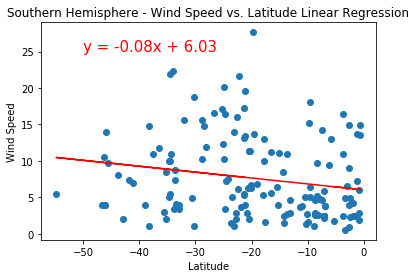

In [34]:
def linear_agression(x,y):
    print(f'The r-squared is : {round(linregress(x, y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,'r-')
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')



# Call an function #1
equation = linear_agression(south_df['Lat'], south_df['Wind Speed'])
# Call an function #2
annotate(equation, -50, 25)
# Set a title
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
# Set xlabel
plt.xlabel('Latitude')
# Set ylabel
plt.ylabel('Wind Speed')
# Save the figure
plt.savefig('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png')

In [35]:
# This graph compares the southern hemisphere the wind speed vs lattitude.